# Testing with images inside each machine folder now

To get the folder with the machine number and it's images inside:

First extract all .dcm files from within their patients folder to the root directory `train_images`. To do this from within the root directory type:
`bash /Users/schama/Desktop/Mirror/00FSU/00CoursesSpring2023/DataHealth/HW7/move_files.sh`
Afterwards delete all empty folders with:
`find . -type d -empty -delete`

If we want the images to be separated by machine we can use the idea below to put them into specific folders:
Create folders for all the machines inside a new directory (in this case `train_machine`)
After that run the other bash script to get the correct `.dcm` file into the correct machine folder. For this we use the `FolderSystem.csv` file that I created from the metadata, with the script `moving_files_to_folders.sh`. Might be interesting if we need to preprocess them in different ways.



In [63]:
import itk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import torch
from torch.utils.data import Dataset, DataLoader
import shutil
from os import listdir
from os.path import isfile, join, isdir

import pydicom as dicom
import cv2

In [4]:
path = "/Users/schama/Downloads/rsna-breast-cancer-detection/"

In [5]:
data = pd.read_csv(path+"train.csv")

In [6]:
# specify your image path
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"

In [15]:
# testing machine 21
ds = dicom.dcmread(image_path+"21/8076716.dcm")


In [16]:
ds.file_meta.TransferSyntaxUID.name

'JPEG 2000 Image Compression (Lossless Only)'

In [22]:
type(ds)

pydicom.dataset.FileDataset

In [23]:
type(meta)

pydicom.dataset.FileDataset

In [18]:
pixel_array_numpy = ds.pixel_array


In [19]:
pixel_array_numpy.shape

(2776, 2082)

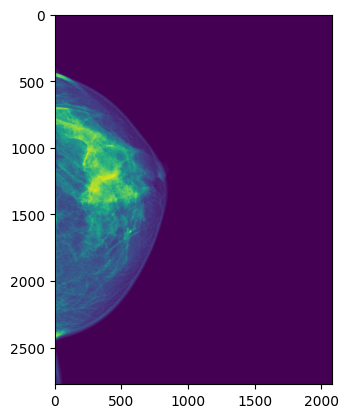

In [20]:
imgplot = plt.imshow(pixel_array_numpy)

In [21]:
# same output as just printing the dile after reading with dcmread!
meta = dicom.read_file(image_path+"21/262802.dcm")

In [136]:
# function to read a bunch of images and get some info about all of them
def get_info(path):
    image = []
    patient = []
    rows = []
    column = []
    image_type = []
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for file in files:
        ds = dicom.dcmread(join(path,file))
        image.append(ds.InstanceNumber)
        patient.append(ds.PatientID)
        rows.append(ds.Rows)
        column.append(ds.Columns)
        image_type.append(ds.file_meta.TransferSyntaxUID.name)
    output= {'image_id': image,
             'patient_id': patient,
             'row': rows,
             'column': column,
             'image_type': image_type
             }
    df = pd.DataFrame(output)
    return df

In [69]:
files = [f for f in listdir(path21) if isfile(join(path21, f))]

In [89]:
#files

In [65]:
path21 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/21/"

In [74]:
machine_21 = get_info(path21)

In [76]:
machine_21.image_type.unique()

array(['JPEG 2000 Image Compression (Lossless Only)'], dtype=object)

In [78]:
machine_21.row.unique()
machine_21.column.unique()

array([2082])

In [80]:
path48 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/48/"
machine_48 = get_info(path48)

In [83]:
machine_48.row.unique()
machine_48.column.unique()
machine_48.image_type.unique()

array(['JPEG 2000 Image Compression (Lossless Only)'], dtype=object)

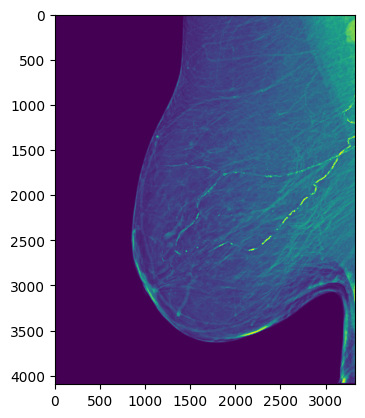

In [90]:
# testing machine 48
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"48/2857331.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [84]:
path49 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/49/"
machine_49 = get_info(path49)

In [85]:
machine_49.row.unique()


array([4096, 3328])

In [86]:
machine_49.column.unique()


array([3328, 2560])

In [88]:
machine_49.image_type.unique()

array(['JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])'],
      dtype=object)

In [94]:
machine_49.head(20)

,image_id,patient)id,row,column,image_type
0,2119914947,1968,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
1,656742434,45014,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
2,2090063965,402,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
3,810135280,36034,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
4,1839265642,26694,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
5,1221657198,15472,3328,2560,"JPEG Lossless, Non-Hierarchical, First-Order P..."
6,1074412721,13900,3328,2560,"JPEG Lossless, Non-Hierarchical, First-Order P..."
7,268374684,13851,3328,2560,"JPEG Lossless, Non-Hierarchical, First-Order P..."
8,408162584,2152,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
9,1471455988,3463,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."


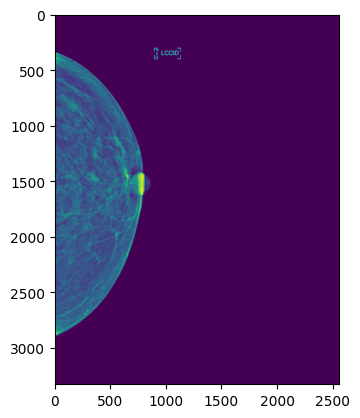

In [95]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"49/357557232.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

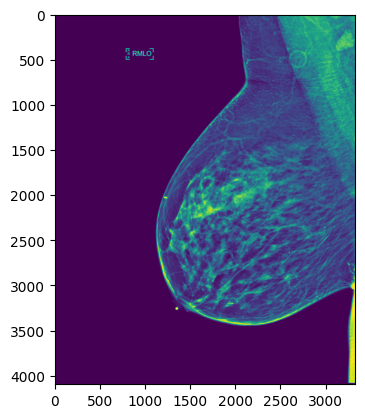

In [91]:
# testing machine 48
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"49/754923.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [96]:
path93 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/93/"
machine_93 = get_info(path93)

In [97]:
machine_93.row.unique()

array([3062, 2294])

In [98]:
machine_93.column.unique()

array([2394, 1914])

In [100]:
machine_93.image_type.unique()

array(['JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])'],
      dtype=object)

In [99]:
machine_93.head()

,image_id,patient)id,row,column,image_type
0,881547173,54052,3062,2394,"JPEG Lossless, Non-Hierarchical, First-Order P..."
1,1228827223,3267,2294,1914,"JPEG Lossless, Non-Hierarchical, First-Order P..."
2,2080005044,23228,3062,2394,"JPEG Lossless, Non-Hierarchical, First-Order P..."
3,2000075758,46144,3062,2394,"JPEG Lossless, Non-Hierarchical, First-Order P..."
4,370141925,2923,2294,1914,"JPEG Lossless, Non-Hierarchical, First-Order P..."


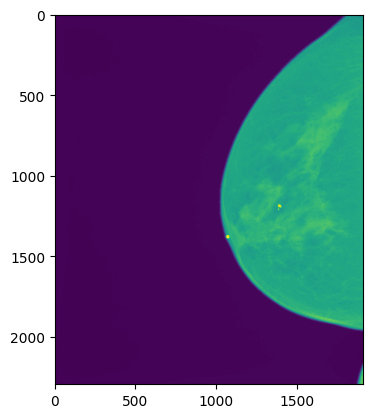

In [102]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"93/1228827223.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

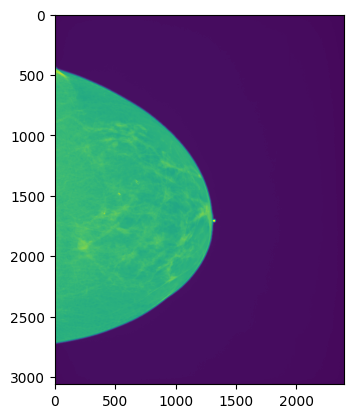

In [103]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"93/881547173.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [104]:
path170 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/170/"
machine_170 = get_info(path170)

In [105]:
machine_170.row.unique()

array([4096, 3328])

In [107]:
machine_170.column.unique()

array([3328, 2560])

In [108]:
machine_170.image_type.unique()

array(['JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])'],
      dtype=object)

In [109]:
machine_170.head()

,image_id,patient_id,row,column,image_type
0,207169829,19931,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
1,1314743828,20942,4096,3328,"JPEG Lossless, Non-Hierarchical, First-Order P..."
2,1804780178,38470,3328,2560,"JPEG Lossless, Non-Hierarchical, First-Order P..."
3,1862097486,19277,3328,2560,"JPEG Lossless, Non-Hierarchical, First-Order P..."
4,284987825,46126,3328,2560,"JPEG Lossless, Non-Hierarchical, First-Order P..."


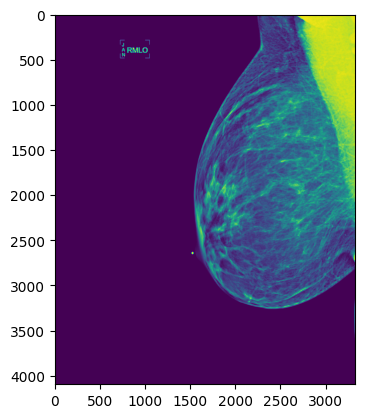

In [110]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"170/207169829.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

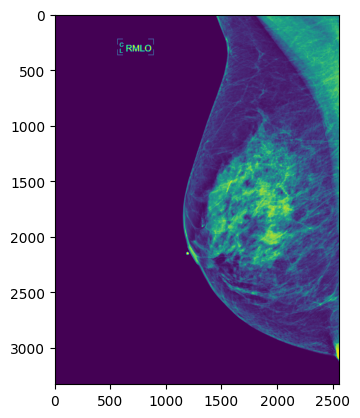

In [111]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"170/1804780178.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [112]:
path190 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/190/"
machine_190 = get_info(path190)

In [113]:
machine_190.row.unique()

array([2294])

In [114]:
machine_190.column.unique()

array([1914])

In [115]:
machine_190.image_type.unique()

array(['JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])'],
      dtype=object)

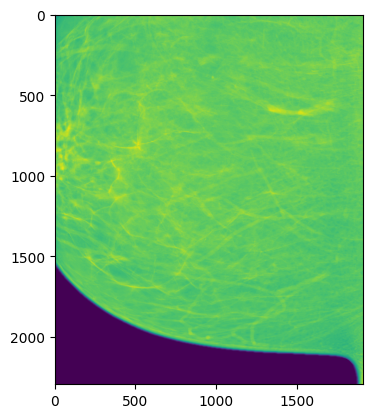

In [116]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"190/136057818.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [117]:
path197 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/197/"
machine_197 = get_info(path197)

In [118]:
machine_197.row.unique()

array([2850, 2294, 2473, 1236])

In [119]:
machine_197.column.unique()

array([2394, 1914, 2045, 1022])

In [120]:
machine_197.image_type.unique()

array(['JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])'],
      dtype=object)

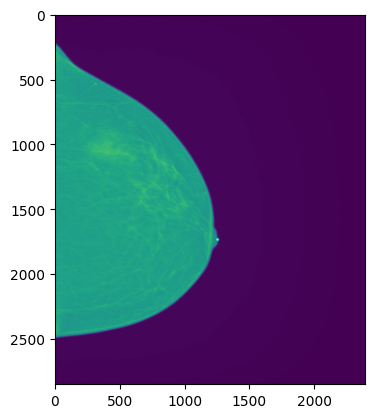

In [121]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"197/898261904.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [122]:
path210 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/210/"
machine_210 = get_info(path210)

In [123]:
machine_210.row.unique()

array([5928, 4740])

In [124]:
machine_210.column.unique()

array([4728, 3540])

In [125]:
machine_210.image_type.unique()

array(['JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])'],
      dtype=object)

In [127]:
machine_210.head()

,image_id,patient_id,row,column,image_type
0,469690079,36387,5928,4728,"JPEG Lossless, Non-Hierarchical, First-Order P..."
1,1574712603,54263,4740,3540,"JPEG Lossless, Non-Hierarchical, First-Order P..."
2,651509199,34671,4740,3540,"JPEG Lossless, Non-Hierarchical, First-Order P..."
3,337260745,49016,4740,3540,"JPEG Lossless, Non-Hierarchical, First-Order P..."
4,1608814541,25538,4740,3540,"JPEG Lossless, Non-Hierarchical, First-Order P..."


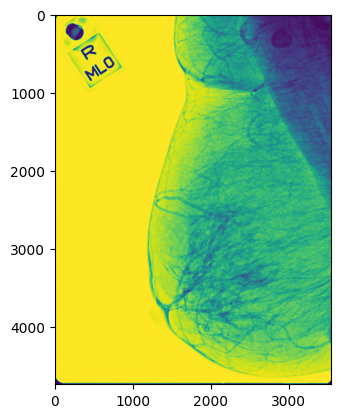

In [126]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"210/14443314.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [128]:
path216 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/216/"
machine_216 = get_info(path216)

In [129]:
machine_216.row.unique()

array([2294])

In [130]:
machine_216.column.unique()

array([1914])

In [131]:
machine_216.image_type.unique()

array(['JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])'],
      dtype=object)

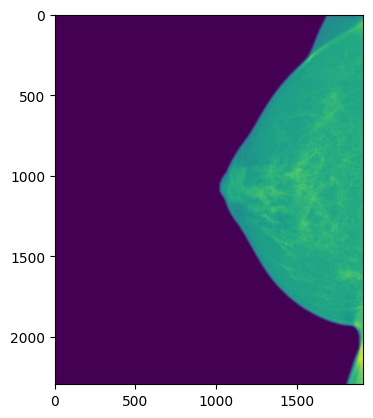

In [132]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"216/18346689.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

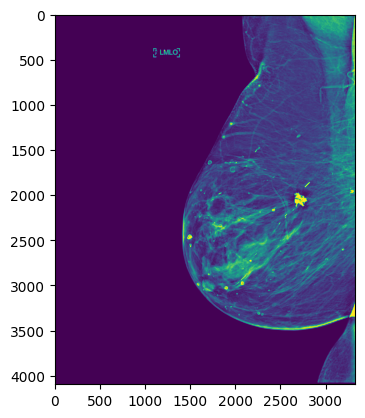

In [133]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"
ds = dicom.dcmread(image_path+"49/1672636630.dcm")
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)


In [137]:
path29 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/29/"
machine_29 = get_info(path29)

InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

In [147]:
# testing machine 49
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection2/train_machine/"
ds = dicom.dcmread(image_path+"29/952117.dcm")



In [148]:
ds

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.43169.1.952117
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.43169.1.952117
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184944.731098'
(0010, 0020) Patient ID                          LO: '43169'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.43169
(0020, 000e) Series Instance UID    

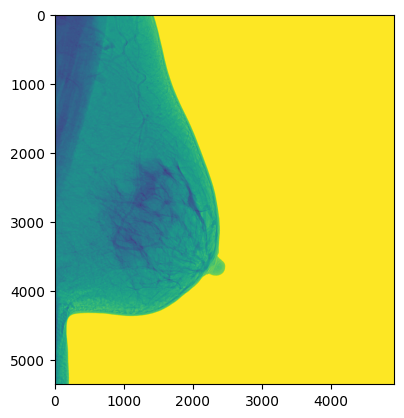

In [149]:
pixel_array_numpy = ds.pixel_array
pixel_array_numpy.shape
imgplot = plt.imshow(pixel_array_numpy)

In [153]:
alldf = pd.concat([machine_21,machine_49,machine_48,machine_93,machine_170,machine_190,machine_197,machine_210,machine_216],
                  keys=['21', '49', '48', '93', '170', '190', '197', '210', '216'],names=['Series_name', 'Row_ID'])


In [156]:
alldf.shape

(46439, 6)

# Below I am studying the data type


In [33]:
type(ds)

pydicom.dataset.FileDataset

In [59]:
ds.InstanceNumber

'8076716'

In [44]:
ds.PatientID

'24983'

In [46]:
ds.Rows

2776

In [47]:
ds.Columns

2082

In [51]:
ds[0x7fe0, 0x0010].keyword

'PixelData'

In [58]:
ds.file_meta[0x0002, 0x0010]
ds.file_meta.TransferSyntaxUID.name

'JPEG 2000 Image Compression (Lossless Only)'

In [36]:
ds

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.24983.1.8076716
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.24983.1.8076716
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184503.970249'
(0010, 0020) Patient ID                          LO: '24983'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.24983
(0020, 000e) Series Instance UID  

In [ ]:

ds2 = dicom.dcmread(path+"train_images/52056/885478248.dcm")
ds3 = dicom.dcmread(path+"train_images/10432/458553546.dcm")
from pydicom.data import get_testdata_file
file = path+"train_images/10226/348710745.dcm"
ds4 = dicom.dcmread(file)
ds5 = dicom.dcmread(path+"train_images/10130/1360338805.dcm")